In [1]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from pathlib import Path

from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
# from common.utils import load_data, mape
from IPython.display import Image

from statsmodels. graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima_model import ARMA 

%matplotlib inline
plt.rcParams['figure.figsize']=(12,6)
pd.options.display.float_format='{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings('ignore')


print(os.getcwd())
datpath=Path('C:/Users/hiwuq/OneDrive/Qian Learning/ML/Datasets')
print(datpath)

C:\Users\hiwuq
C:\Users\hiwuq\OneDrive\Qian Learning\ML\Datasets


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.60,19.20,44.79,19.79,44.73,19.00,45.57,...,17.03,45.53,6.60,733.50,92.00,7.00,63.00,5.30,13.28,13.28
2016-01-11 17:10:00,60,30,19.89,46.69,19.20,44.72,19.79,44.79,19.00,45.99,...,17.07,45.56,6.48,733.60,92.00,6.67,59.17,5.20,18.61,18.61
2016-01-11 17:20:00,50,30,19.89,46.30,19.20,44.63,19.79,44.93,18.93,45.89,...,17.00,45.50,6.37,733.70,92.00,6.33,55.33,5.10,28.64,28.64
2016-01-11 17:30:00,50,40,19.89,46.07,19.20,44.59,19.79,45.00,18.89,45.72,...,17.00,45.40,6.25,733.80,92.00,6.00,51.50,5.00,45.41,45.41
2016-01-11 17:40:00,60,40,19.89,46.33,19.20,44.53,19.79,45.00,18.89,45.53,...,17.00,45.40,6.13,733.90,92.00,5.67,47.67,4.90,10.08,10.08
2016-01-11 17:50:00,50,40,19.89,46.03,19.20,44.50,19.79,44.93,18.89,45.73,...,17.00,45.29,6.02,734.00,92.00,5.33,43.83,4.80,44.92,44.92
2016-01-11 18:00:00,60,50,19.89,45.77,19.20,44.50,19.79,44.90,18.89,45.79,...,17.00,45.29,5.90,734.10,92.00,5.00,40.00,4.70,47.23,47.23
2016-01-11 18:10:00,60,50,19.86,45.56,19.20,44.50,19.73,44.90,18.89,45.86,...,17.00,45.29,5.92,734.17,91.83,5.17,40.00,4.68,33.04,33.04
2016-01-11 18:20:00,60,40,19.79,45.60,19.20,44.43,19.73,44.79,18.89,45.79,...,17.00,45.29,5.93,734.23,91.67,5.33,40.00,4.67,31.46,31.46


<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 

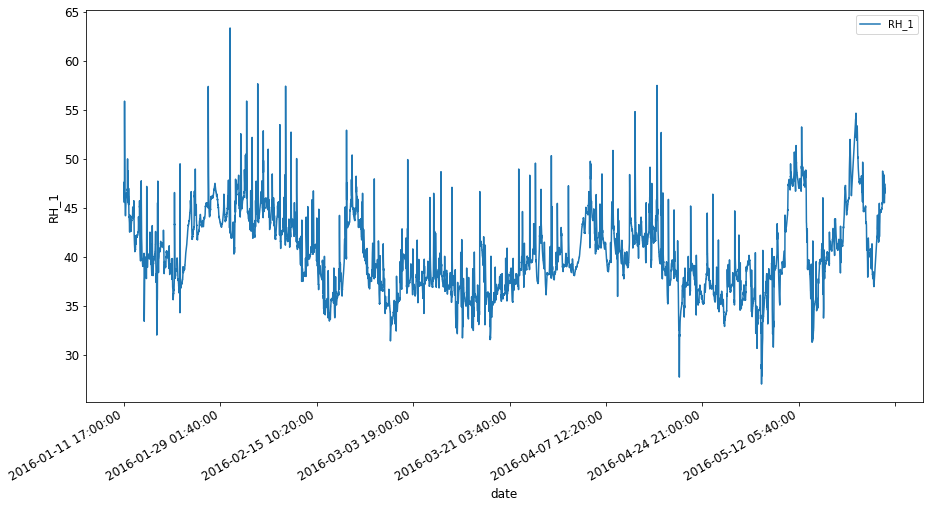

In [2]:
energy=pd.read_csv(datpath/'energydata.csv',header=0, index_col=0)
display(energy.head(10))
energy.info()

energy.plot(y='RH_1', subplots=True, figsize=(15,8), fontsize=12)
plt.xlabel('date',fontsize=12)
plt.ylabel('RH_1',fontsize=12)
plt.show()

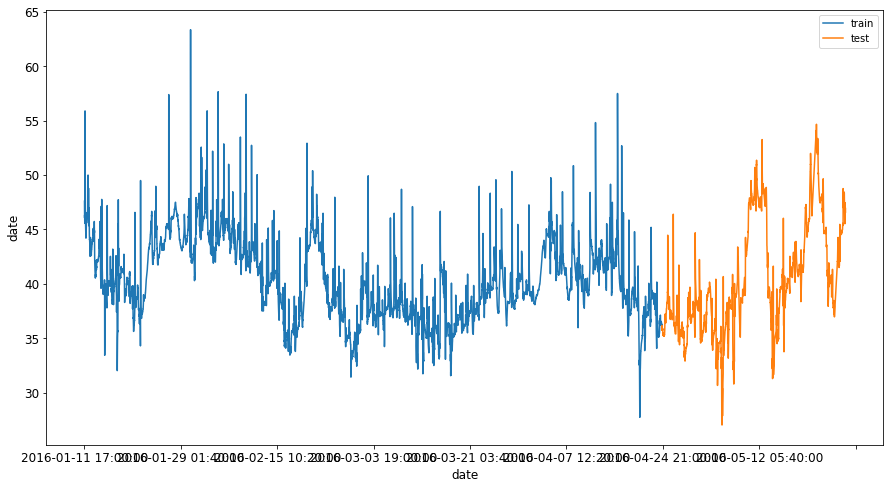

train size: (14976, 1) 
 test size: (4759, 1)


In [3]:
train_dt_start='2016-01-11 17:00:00'
test_dt_start='2016-04-24 17:00:00'

energy[(energy.index<test_dt_start) & (energy.index>=train_dt_start)][['RH_1']].rename(columns={'RH_1':'train'})\
.join(energy[(energy.index>=test_dt_start)][['RH_1']].rename(columns={'RH_1':'test'}),how='outer')\
.plot(y=['train','test'],figsize=(15,8),fontsize=12)

plt.xlabel('date',fontsize=12)
plt.ylabel('date',fontsize=12)
plt.show()

train=energy[(energy.index<test_dt_start) & (energy.index>=train_dt_start)][['RH_1']]
test=energy[(energy.index>=test_dt_start)][['RH_1']]

print('train size:', train.shape, '\n','test size:',test.shape)

In [4]:
scaler=MinMaxScaler()
train['RH_1']=scaler.fit_transform(train)
test['RH_1']=scaler.transform(test)

display(train.head(10))

,RH_1
date,
2016-01-11 17:00:00,0.56
2016-01-11 17:10:00,0.53
2016-01-11 17:20:00,0.52
2016-01-11 17:30:00,0.51
2016-01-11 17:40:00,0.52
2016-01-11 17:50:00,0.51
2016-01-11 18:00:00,0.51
2016-01-11 18:10:00,0.50
2016-01-11 18:20:00,0.50


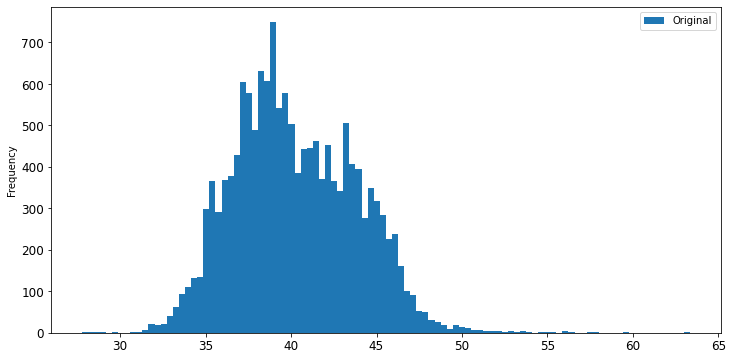

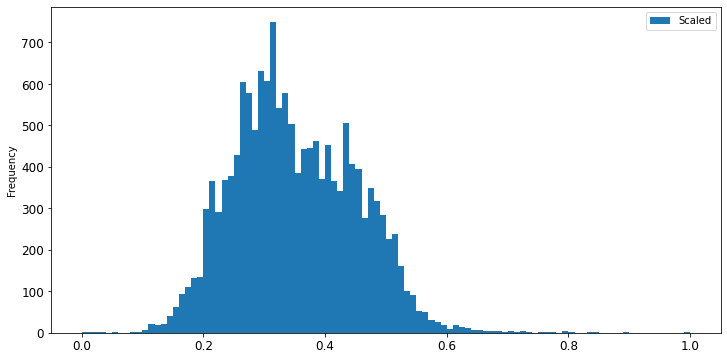

In [37]:
energy[(energy.index<test_dt_start) & (energy.index>=train_dt_start)][['RH_1']].rename(columns={'RH_1':'Original'})\
.plot.hist(bins=100,fontsize=12)

train[['RH_1']].rename(columns={'RH_1':'Scaled'})\
.plot.hist(bins=100,fontsize=12)

plt.show()

In [5]:
### this is stationary test 
adf,pvalue,usedlag,nobs,threshold,icbtest=adfuller(train,
                                                  maxlag=None, 
                                                  regression='c',
                                                  autolag='AIC',
                                                  store=False,
                                                  regresults=False)
values=[adf,pvalue,usedlag,nobs,threshold,icbtest]
names=['adf','pvalue','usedlag','nobs','threshold','icbtest']
print(*list(zip(names,values)),sep="\n")

## H0: the series is non-stationary
## small pvalue or adf less than threshold of all levels

('adf', -4.809973555144839)
('pvalue', 5.204639687541372e-05)
('usedlag', 38)
('nobs', 14937)
('threshold', {'1%': -3.430787867318912, '5%': -2.8617335183528585, '10%': -2.566873005158767})
('icbtest', -88181.17304176124)


In [6]:
### this is white noise test
lbvalue, pvalue=acorr_ljungbox(train,lags=1)
                              #boxpierce=False,
                              #model_df=0,
                              #period=None,
                              #return_df=True,
                              #auto_lag=False

values=[lbvalue, pvalue]
names=['lbvalue', 'pvalue']
print(*list(zip(names,values)),sep="\n")

## H0: the series is non-stationary
## small pvalue or adf less than threshold of all levels

('lbvalue', array([14661.33]))
('pvalue', array([0.]))


<AxesSubplot:xlabel='date'>

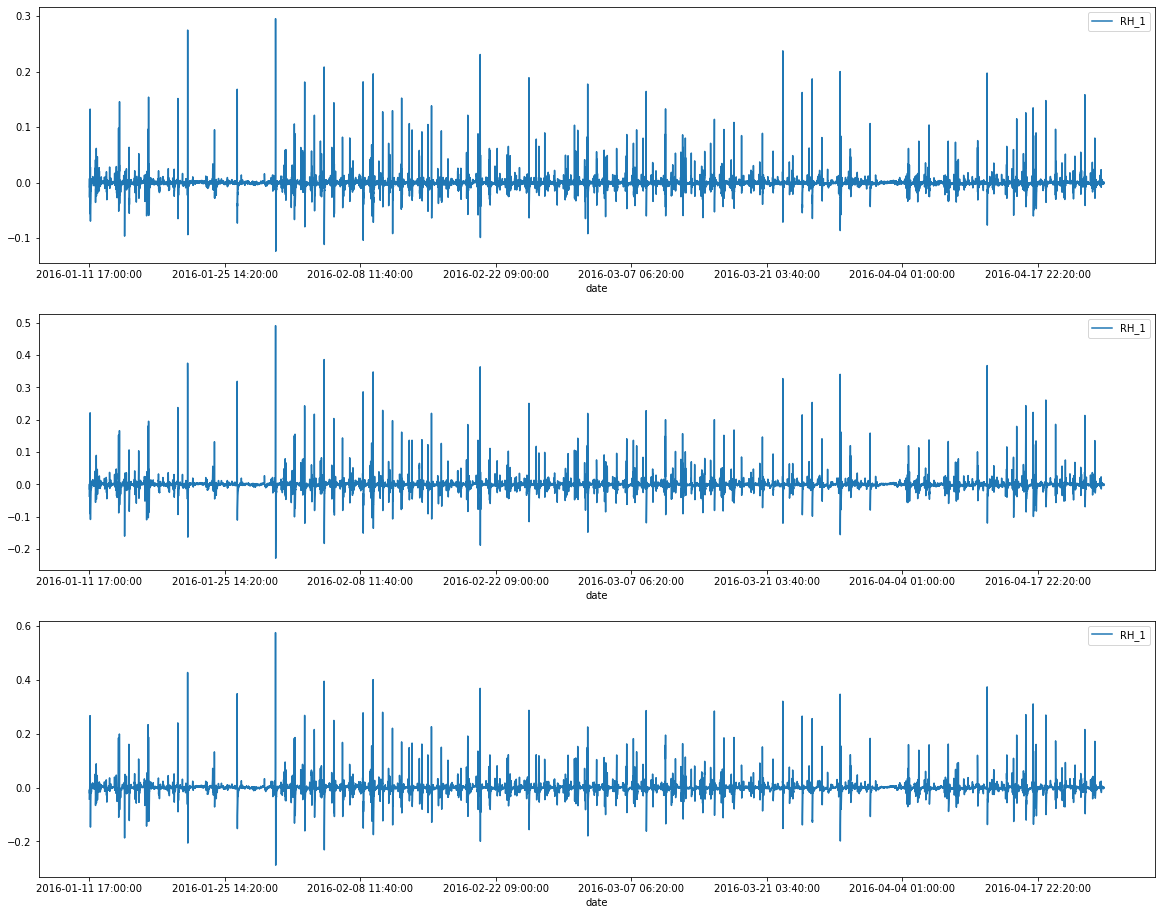

In [51]:
### ARIMA model, difference check 
diff1=train.diff(1)
diff2=train.diff(2)
diff3=train.diff(3)

fig=plt.figure(figsize=(20,16))
ax1=fig.add_subplot(311)
diff1.plot(ax=ax1)
ax2=fig.add_subplot(312)
diff2.plot(ax=ax2)
ax3=fig.add_subplot(313)
diff3.plot(ax=ax3)

## difference of order=1,2,3 are similar, so set d=1 is enough

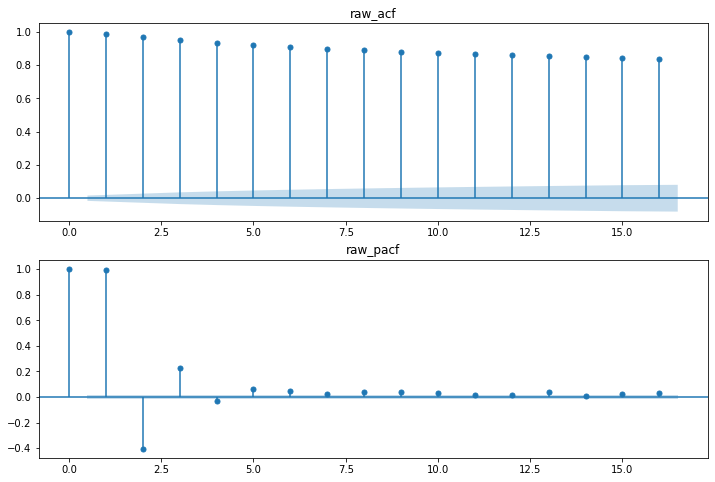

In [7]:
### set p,q value or ARIMA not suitable 
### use ACF, PACF as criteria

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig,axes=plt.subplots(2,1,figsize=(12,4*2))

plot_acf(train['RH_1'],lags=16,title='raw_acf',ax=axes[0])
plot_pacf(train['RH_1'],lags=16,title='raw_pacf',ax=axes[1])
plt.show()

## in this case, acf tail off, pacf cut off at 4
## 

In [8]:
model=SARIMAX(endog=train, order=(4,1,0),seasonal_order=(1,1,0,24))
results=model.fit()
print(results.summary())

AttributeError: 'SARIMAXResults' object has no attribute 'summray'

In [13]:
test_shifted=test.copy()
Horizon=5  # length of sliding window
for t in range(1, Horizon+1):
    test_shifted['RH_1+'+str(t)]=test_shifted['RH_1'].shift(-t)
    
test_shifted=test_shifted.dropna(how='any')
test_shifted.head(10)


,RH_1
date,
2016-04-24 17:00:00,0.24
2016-04-24 17:10:00,0.23
2016-04-24 17:20:00,0.23
2016-04-24 17:30:00,0.22
2016-04-24 17:40:00,0.23
...,...
2016-05-27 17:20:00,0.53
2016-05-27 17:30:00,0.53
2016-05-27 17:40:00,0.53


,RH_1,RH_1+1,RH_1+2,RH_1+3,RH_1+4,RH_1+5
date,,,,,,
2016-04-24 17:00:00,0.24,0.23,0.23,0.22,0.23,0.23
2016-04-24 17:10:00,0.23,0.23,0.22,0.23,0.23,0.23
2016-04-24 17:20:00,0.23,0.22,0.23,0.23,0.23,0.23
2016-04-24 17:30:00,0.22,0.23,0.23,0.23,0.23,0.23
2016-04-24 17:40:00,0.23,0.23,0.23,0.23,0.23,0.23
...,...,...,...,...,...,...
2016-05-27 16:30:00,0.51,0.53,0.55,0.55,0.54,0.53
2016-05-27 16:40:00,0.53,0.55,0.55,0.54,0.53,0.53
2016-05-27 16:50:00,0.55,0.55,0.54,0.53,0.53,0.53


In [18]:
%%time
train_window=4750  # 24*6*30 - window of 30 days

train_ts=train['RH_1']
test_ts=test_shifted

history=[x for x in train_ts]
history=history[(-train_window):]

predictions=list()
for t in range(test_ts.shape[0]):
    model=SARIMAX(endog=history,order=(4,1,0),seasonal_order=(1,1,0,24))
    model_fit=model.fit()
    yhat=model_fit.forecast(steps=Horizon)
    predictions.append(yhat)
    obs=list(test_ts.iloc[t])
    
    history.append(obs[0])
    history.pop(0)
    print(test_ts.index[t])
    print(t+1, ': predicted=', yhat, 'expected =', obs)

KeyboardInterrupt: 

In [ ]:
## compare
eval_df=pd.DataFrame(predictions,columns=['t+'+str(t) for t in range(1, Horizon+1)])
eval_df['date']=test.index[0:len(test.index)-Horizon+1]
eval_df=pd.melt(eval_df, id_vars='date', value_name='Prediction', var_name='h')
eval_df['actual']=np.array(np.transpose(test_ts)).ravel()